In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

# MLB DATA ANALYSIS #

## Authors: Dylan Andrews, Garrett Brown, James Estey, Joseph Madigan, Madden Kline, Nathan Miller ##

# Introduction/Background: #

There are a multitude of factors that contribute to what makes a player strong enough to make it to the major leagues of any sport. However, there are many factors that separate out players even once they have made it. In the MLB, there are a multitude of factors that seem capable of being strong predictors of a player. As a player ages, you might expect them to become a weaker player strength wise, but strong mentally. You would expect to see that higher paid players perform better than those on lower contract values. Position played even seems to dictate the strengths of a player. But does the data actually alighn with this? We wanted to analyze a few stats that gave a broad idea of the strength of a player, and compare it to these variables.

# Data #

where were datasets obtained, where, and what did we do to the data

In [2]:
contract_df = pd.read_csv('2025_contract_avg.csv')
show(contract_df)

Loading ITables v2.5.2 from the internet... (need help?)


This dataset simply looks at the contract average per year of all MLB players as of 2025. Contract average is a useful metric as it takes into account the full contract value, not just the amount being paid out per year. This accounts for players like Shohei Ohtani, who despite having a 700 million dollar contract, has deferred it and only gets paid 2 million per year. A value like contract average takes this into account, and still shows that he is in fact the highest paid player currently in the MLB. This data was obtained from spotrac.com, looking at their list of MLB Contract Average Rankings list. It was cleaned to just names and salaries, where we then added a categorical description of the salary range for extra clarity.

In [3]:
plus_df = pd.read_csv('plusstats.csv')
show(plus_df)

Loading ITables v2.5.2 from the internet... (need help?)


This dataset looks at 3 main batting stats for MLB players, in their + form, which takes into account park factors, since some parks pose advantages based on their weather conditions, but also due to non-standard outfields. These stats are then normalized so that 100 is the league average, meaning any players above 100 are stronger than average, and below are weaker. OBP+ looks at the on-base percentage of a player, to determine how consistently they either walk or hit to get on base. SLG+ looks at the power of their hits, determinig the strength of their at-bats, not just successful hits. Finally, wRC+ looks at runs created for their team, looking at not just things like home runs, but also runs batted in, and even things like sacrifice pop-outs.

In [4]:
df_combined = pd.read_csv('combined_mlb_data.csv')
show(df_combined)

Loading ITables v2.5.2 from the internet... (need help?)


This dataset looks at many stats, but we are focusing on the 4 main batting stats for MLB players. The first stat we are looking at is the avg, which takes the average percentage a player has to get a hit every time they get an at-bat. The next 3 are in their + form, which are OBP+, SLG+, and wRC+, and they take into account park factors, since some parks pose advantages based on their weather conditions, but also due to non-standard outfields. We are also focusing on the age of each and every player, so I am able to compare these stats to their age. With these 4 main offensive stats, I will be able to determine which age groups are better offensive players.

In [5]:
DF_speed = pd.read_csv('sprint_speed (1).csv')
show(DF_speed)

Loading ITables v2.5.2 from the internet... (need help?)


This dataset is about sprint speed. Sprint speed is measured by how many feet the player can run within one second (ft/sec). Determining the speed of an athlete is also a big factor in how good the athlete is offensively. The faster the athlete is, the more times they can reach base safely and take extra bases. This dataset also gives the age of every athlete that was measured. Therefore, we were able to create a graph that can tell us the average sprint speed per age group, to see which age groups were the fastest, and that will help us determine which age groups are the better offensive players.

# Initial Exploration #

what did we do initially to analyze the dataset and get ideas?

(probably just do some value counts and such here)

also probably talk about how we decided what stats were good determiners here

# Proposed Questions #

1. How does age affect quality of player?
2. How does salary affect quality of player?
3. How does position affect quality of player?

# Analysis and Results #
just start dumping stuff in here, we can clean and explain later

## Salary ##

In [6]:
# Just merging the plus and salary dataframes for easier graphing
df_plussal = pd.merge(plus_df, contract_df, on = 'Name', how = 'left')

# Defining the order of categories to call on later for easier visuals
desired_order = ['<1M', '1 - 10M', '10 - 20M', '20 - 30M', '30 - 40M', '40 - 50M', '>50M']

### Salary vs. OBP+ ###

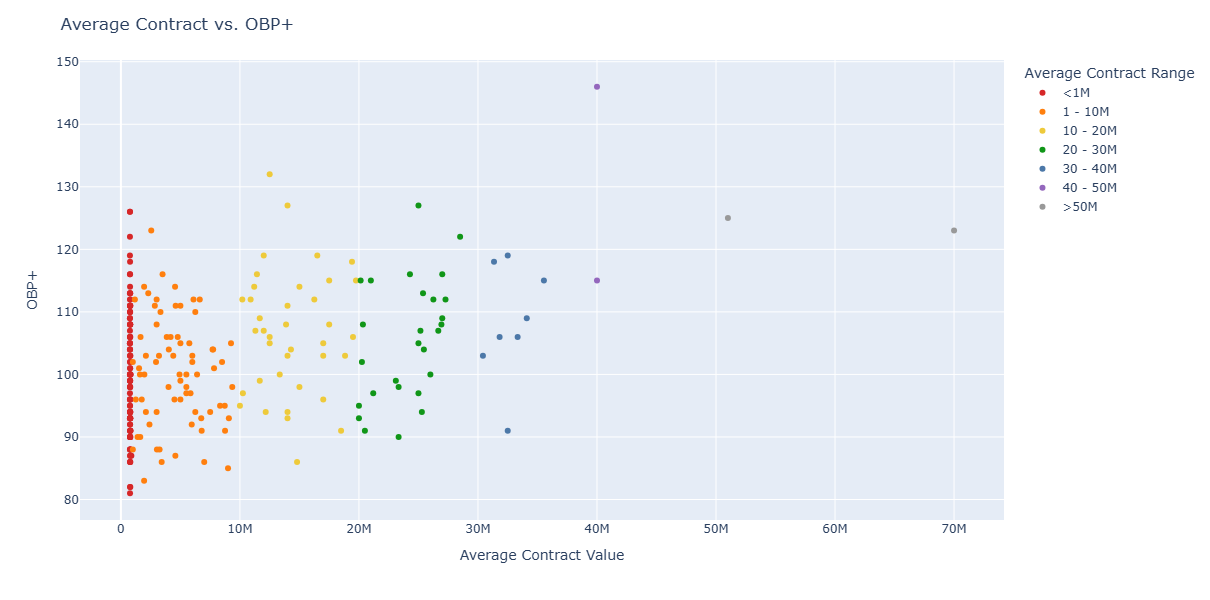

In [7]:
# making figure, looking at salary vs obp+
fig = px.scatter(df_plussal,
                 x = 'Salary',
                 y = 'OBP+',
                 color = 'salcat',
                 category_orders={'salcat': desired_order}, # makes sure categories are smallest to largest
                 color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']), # colors!
                 hover_data = 'Name')

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. OBP+',
                  xaxis_title = 'Average Contract Value')

fig.show()

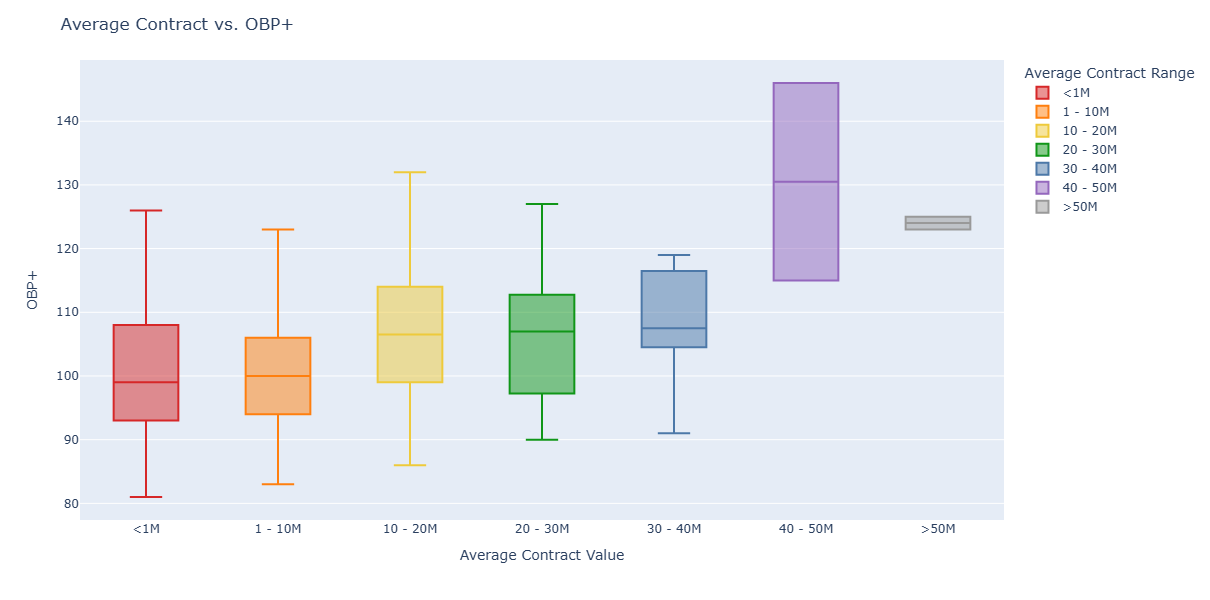

In [8]:
fig = px.box(df_plussal,
             x = 'salcat',
             y = 'OBP+',
             color = 'salcat',
             category_orders={'salcat': desired_order},
             color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']))

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. OBP+',
                  xaxis_title = 'Average Contract Value')


fig.show()

Here we can see that there does appear to be some increase in average and median OBP+ on the basis of salary. It is clearly present at the very upper end, where the OBP+ of 40+ million players does sit clearly higher than the rest, but there appears to be fairly marginal changes on the lower ends. This is also not free from the fact that there are far fewer players on the upper end of contract values, meaning we can't certainly say that they are not outliers.

### Salary vs. SLG+ ###

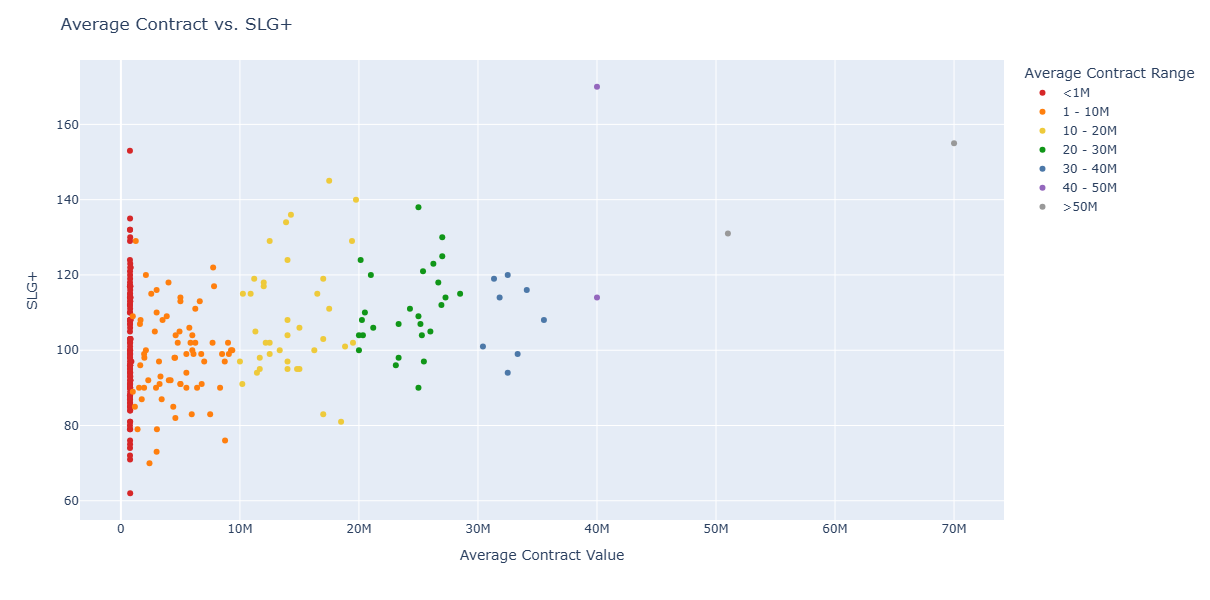

In [9]:
fig = px.scatter(df_plussal,
                 x = 'Salary',
                 y = 'SLG+',
                 color = 'salcat',
                 category_orders={'salcat': desired_order},
                 color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']),
                 hover_data = 'Name')

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. SLG+',
                  xaxis_title = 'Average Contract Value')

fig.show()

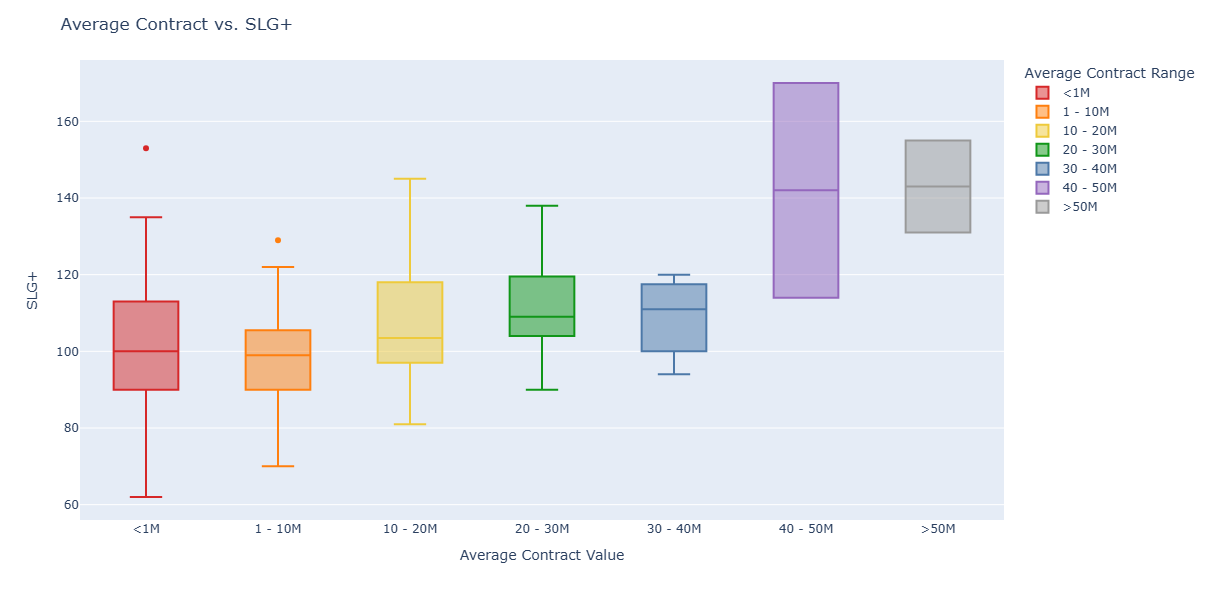

In [10]:
fig = px.box(df_plussal,
             x = 'salcat',
             y = 'SLG+',
             color = 'salcat',
             category_orders={'salcat': desired_order},
             color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']))

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. SLG+',
                  xaxis_title = 'Average Contract Value')


fig.show()

Here there is a much more notable increase on the lower end of SLG+ as salary increases. Aside from <1M vs 1-10M, the median increases as the salary range increases. While the spreads of these points suggests that it is not guaranteed that a higher paid player hits harder, it does seem to play some partial role in its prediction.

### Salary vs. wRC+ ###

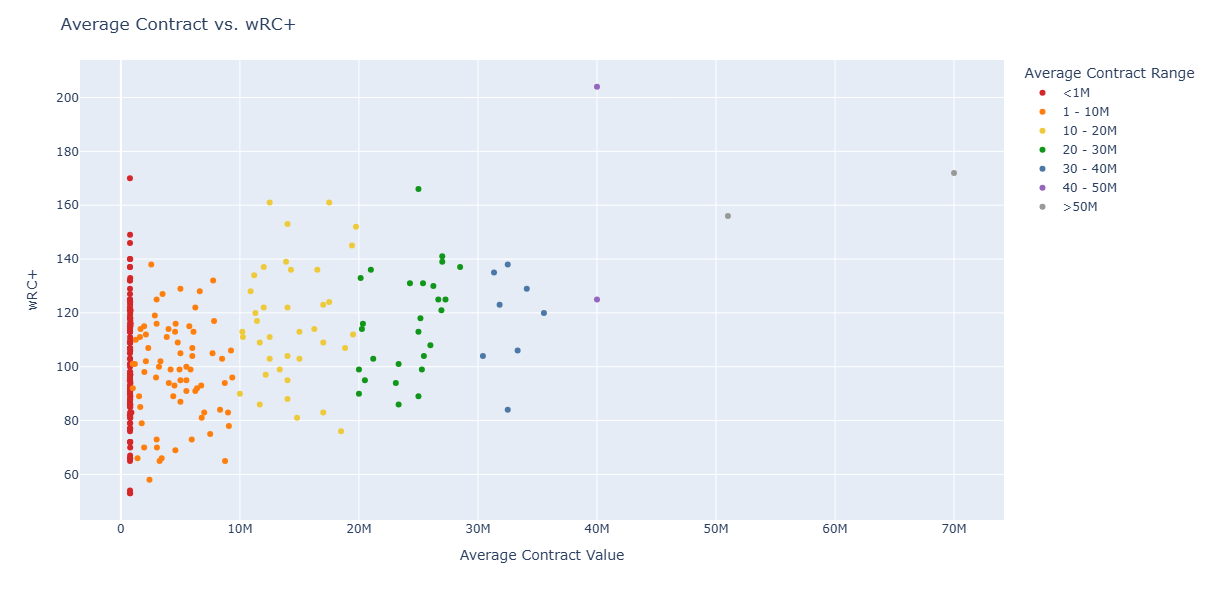

In [11]:
fig = px.scatter(df_plussal,
                 x = 'Salary',
                 y = 'wRC+',
                 color = 'salcat',
                 category_orders={'salcat': desired_order},
                 color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']),
                 hover_data = 'Name')

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. wRC+',
                  xaxis_title = 'Average Contract Value')

fig.show()

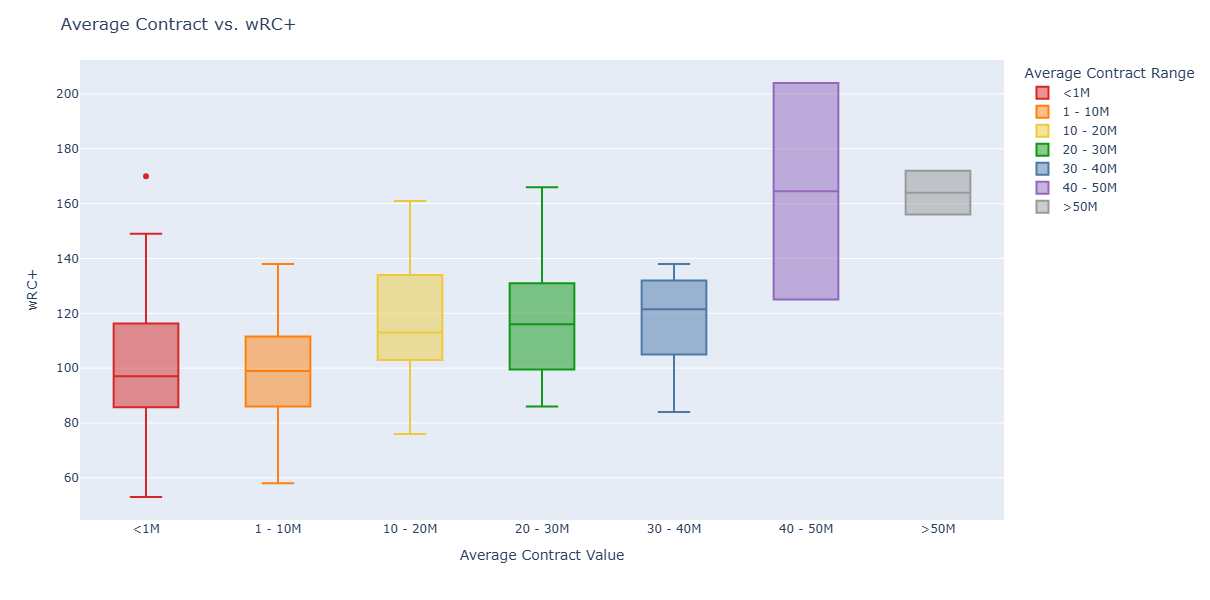

In [12]:
fig = px.box(df_plussal,
             x = 'salcat',
             y = 'wRC+',
             color = 'salcat',
             category_orders={'salcat': desired_order},
             color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']))

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. wRC+',
                  xaxis_title = 'Average Contract Value')


fig.show()

With wRC+, there also appears to be a morderate increase in the range of values as you move up the salary ranges. Once again a 30-40M player is far from guaranteed to have a higher wRC+ compared to a 20-30M player, but they do seem significantly better than <10M player.

## Position ##

In [13]:
df_stats = pd.read_csv("plusstats.csv")
df_extra = pd.read_csv("output.csv")
# Merging datasets to get Position with the plus stats
df_merged = df_stats.merge(
    df_extra[['Player', 'Pos']],
    left_on='Name',
    right_on='Player',
    how='left'
)
df_merged = df_merged.drop(columns=['Player'])
df_merged = df_merged.drop_duplicates(subset='Name', keep='first')
show(df_merged)

Loading ITables v2.5.2 from the internet... (need help?)


### Position vs OBP+ ###

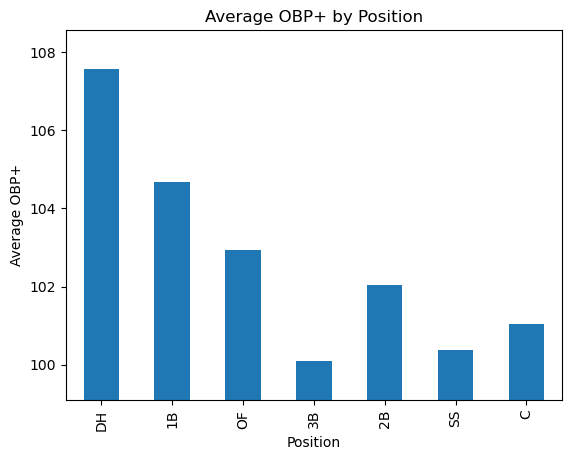

In [14]:
avg_obp = df_merged.groupby('Pos')['OBP+'].mean()
order = ['DH', '1B','OF','3B', '2B', 'SS', 'C']
avg_obp = avg_obp.reindex(order)
plt.figure()
avg_obp.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Average OBP+')
plt.title('Average OBP+ by Position')
plt.ylim(avg_obp.min() - 1, avg_obp.max() + 1)
plt.show()

C:\Users\James\AppData\Local\Temp\ipykernel_17168\1578686357.py:8: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



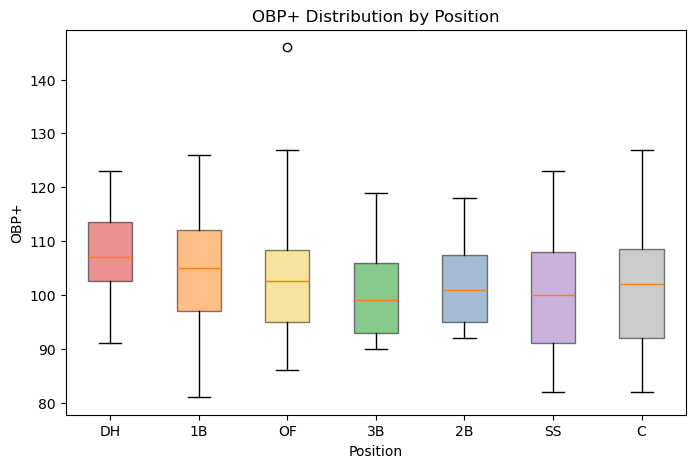

In [15]:
order = ['DH', '1B', 'OF', '3B', '2B', 'SS', 'C']
colors = ['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']

df_plot = df_merged[df_merged['Pos'].isin(order)].copy()
data = [df_plot[df_plot['Pos'] == pos]['OBP+'] for pos in order]

plt.figure(figsize=(8,5))
box = plt.boxplot(data, labels=order, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

plt.xlabel('Position')
plt.ylabel('OBP+')
plt.title('OBP+ Distribution by Position')
plt.show()

Here we can see the rate at which each position gets on base. I ordered the positions from left to right by their defensive focus, so we should generally expect a decrease in productivity from right to left, given how much time each position spends practicing solely on offense. We see that this pattern generally holds, except at third base, which has a lower on-base rate given its typically high offensive focus.

### Position vs SLG+ ###

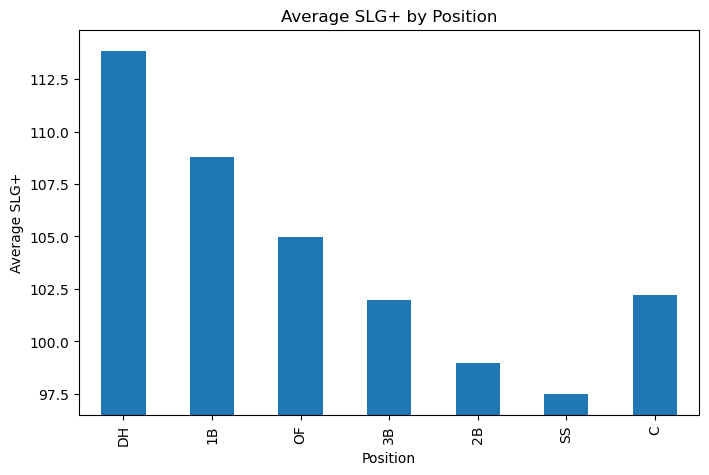

In [16]:
avg_slg = df_merged.groupby('Pos')['SLG+'].mean()
order = ['DH', '1B','OF','3B', '2B', 'SS', 'C']
avg_slg = avg_slg.reindex(order)
plt.figure(figsize=(8,5))
avg_slg.plot(kind='bar', color='#1f77b4')
plt.xlabel('Position')
plt.ylabel('Average SLG+')
plt.title('Average SLG+ by Position')
plt.ylim(avg_slg.min() - 1, avg_slg.max() + 1)
plt.show()

C:\Users\James\AppData\Local\Temp\ipykernel_17168\2478539544.py:8: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



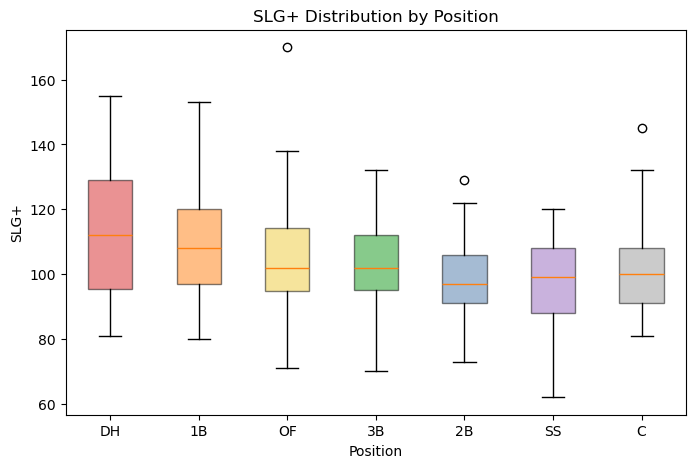

In [17]:
order = ['DH', '1B', 'OF', '3B', '2B', 'SS', 'C']
colors = ['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']

df_plot = df_merged[df_merged['Pos'].isin(order)].copy()
data = [df_plot[df_plot['Pos'] == pos]['SLG+'] for pos in order]

plt.figure(figsize=(8,5))
box = plt.boxplot(data, labels=order, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

plt.xlabel('Position')
plt.ylabel('SLG+')
plt.title('SLG+ Distribution by Position')
plt.show()

Here we can see that SLG+ follows the expected pattern slightly better, with third base having a higher SLG+ relative to their OBP+ above. We also see catchers having a high SLG+ given how demanding their defensive position is.

### Position vs wRC+ ###

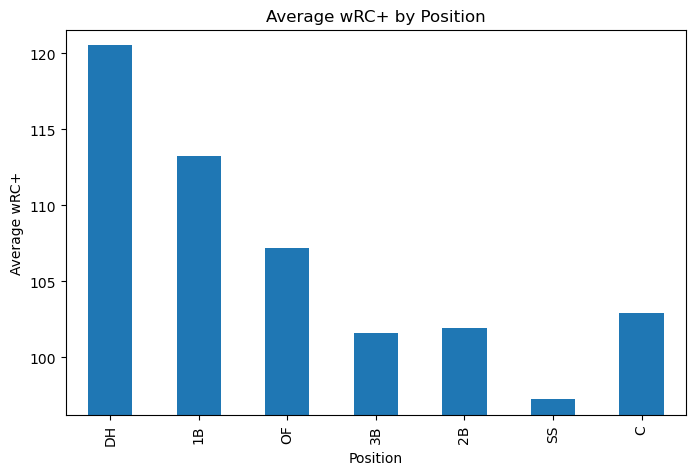

In [18]:
avg_wrc = df_merged.groupby('Pos')['wRC+'].mean()
order = ['DH', '1B','OF','3B', '2B', 'SS', 'C']
avg_wrc = avg_wrc.reindex(order)
plt.figure(figsize=(8,5))
avg_wrc.plot(kind='bar', color='#1f77b4')
plt.xlabel('Position')
plt.ylabel('Average wRC+')
plt.title('Average wRC+ by Position')
plt.ylim(avg_wrc.min() - 1, avg_wrc.max() + 1)
plt.show()

C:\Users\James\AppData\Local\Temp\ipykernel_17168\751098730.py:8: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



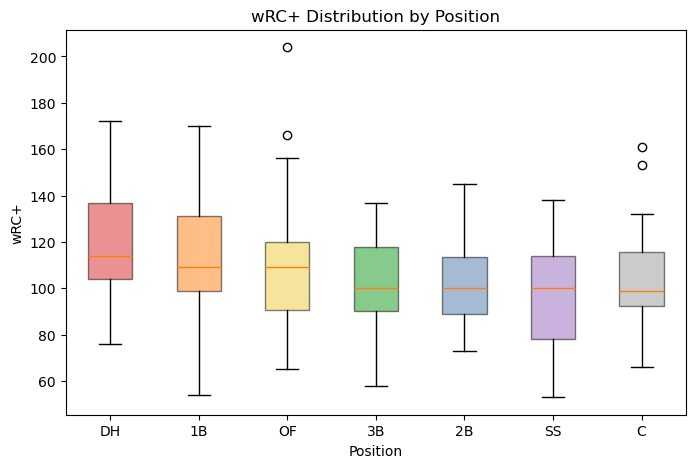

In [19]:
order = ['DH', '1B', 'OF', '3B', '2B', 'SS', 'C']
colors = ['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']

df_plot = df_merged[df_merged['Pos'].isin(order)].copy()
data = [df_plot[df_plot['Pos'] == pos]['wRC+'] for pos in order]

plt.figure(figsize=(8,5))
box = plt.boxplot(data, labels=order, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

plt.xlabel('Position')
plt.ylabel('wRC+')
plt.title('wRC+ Distribution by Position')
plt.show()

wRC+ follows the expected pattern well, with third base and shortstop being slightly lower than one might expect, and catcher being relatively high. Overall, there is a clear pattern: the less time a player needs to spend on defense, the more productive they are offensively.

## Position vs Sprint Speed

In [20]:
df25 = pd.read_csv('./sprint_speed(2025).csv')
show(df25)

Loading ITables v2.5.2 from the internet... (need help?)


In [21]:
df25.head()

,"last_name, first_name",player_id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed
0,"Turner, Trea",607208,143,PHI,SS,32,265,117.0,4.22,30.3
1,"Scott II, Victor",687363,138,STL,CF,24,141,87.0,4.13,30.2
2,"Witt Jr., Bobby",677951,118,KC,SS,25,245,101.0,4.15,30.2
3,"Buxton, Byron",621439,142,MIN,CF,31,165,56.0,4.13,30.2
4,"Hill, Derek",656537,145,CWS,CF,29,50,24.0,4.21,30.1


In [22]:
df25.groupby('position')['sprint_speed'].mean()
df25_avg_sprintspeed=df25.groupby('position')['sprint_speed'].mean()
df25_avg_sprintspeed

position
1B    26.510345
2B    27.666197
3B    27.213889
C     26.131325
CF    28.701563
DH    26.508163
LF    27.848387
RF    27.771642
SS    27.860377
Name: sprint_speed, dtype: float64

In [23]:
fig = px.bar(
    df25_avg_sprintspeed,
    title="Average Sprint Speed vs Position (2025)"
)
fig.update_layout(
                  xaxis_title="Position",
                  yaxis_title="Average Sprint Speed")
fig.show()

In [24]:
fig = px.scatter(
    df25_avg_sprintspeed,
 
    title=" Average Sprint Speed(feet/sec) vs Position (2025)"
)
fig.update_layout(
                  xaxis_title="Position",
                  yaxis_title="Average Sprint Speed (feet/sec)")
fig.show()

## Analysis

Here we see the average sprint speed for players at each position. The sprint speed stat is calculated in feet per second at the fastest one second burst. In the first graph we are shown that there is very little disparity in sprint speed among the different positions, with catchers being the slowest and center fielders being the fastest. However, we only see a difference of about 2.6 feet per second between these positions. This does not seem to be very significant, however the second graph allows us to see the difference as more apparent than the first. In the second graph we get a more narrow scale of values on the y axis, allowing each average sprint speed to appear further apart. This is useful practically because the differences in sprint speeds is actually more relevant than it may appear strictly on the page. 

The distance between each MLB base is exactly 90 feet, and we know that a runner getting to a base even just a millisecond late determines whether he is safe or out. Because of this, we can picture a player running to a base and realize that a player running 2 feet per second slower than another player, over the course of 90 feet, could cause the player to be multiple feet short of the plate at the time the other team gets the baseball on base to tag the runner out. Even if one runner is only 0.5 feet per second slower than another during their fastest one second burt of speed, the slower runner could easily be one whole foot short of the base when the faster runner has already reached the base and been declared safe. Because Baseball is a game of split seconds that can decide entire seasons, even a small difference in sprint speed can alter a player's running stats and team success.

Therefore, position played by MLB players does have a significant impact on sprint speed. This is likely due to certain positions requiring different skillsets, some that rely on quickness and some that rely on reaction speed or power. For this reason, players that train to play different positions will naturally be at different levels of quickness when running the bases. 

## Age ##

### Average vs Age ###

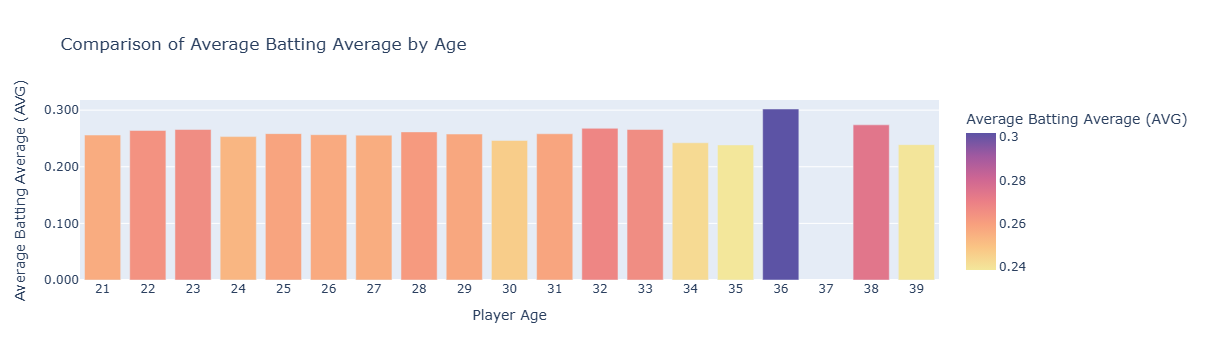

In [25]:
import pandas as pd
import plotly.express as px 

# Loading the MLB player statistics file
df_combined = pd.read_csv('combined_mlb_data.csv')

# Converting Batting Average (AVG) to numeric, handling errors
df_combined['AVG'] = pd.to_numeric(df_combined['AVG'], errors='coerce')

# Dropping rows with missing Age or AVG for accurate grouping
df_combined = df_combined.dropna(subset=['Age', 'AVG'])

# Calculating the average Batting Average (AVG) for each unique Age
DF_avg_by_age = df_combined.groupby('Age')['AVG'].mean().reset_index()
DF_avg_by_age = DF_avg_by_age.rename(columns={'AVG': 'Average Batting Average'})

#Creating the bar plot
fig = px.bar(
    DF_avg_by_age,
    x='Age',
    y='Average Batting Average',
    title='Comparison of Average Batting Average by Age',
    labels={'Average Batting Average': 'Average Batting Average (AVG)', 'Age': 'Player Age'},
    color='Average Batting Average',
    color_continuous_scale=px.colors.sequential.Sunset
)

# Customizing the layout 
fig.update_layout(
    xaxis={'tickmode': 'linear'}, 
    yaxis_tickformat='.3f',        
    xaxis_title='Player Age',
    yaxis_title='Average Batting Average (AVG)'
)

# Displaying the plot
fig.show()

This Graph right here shows that age isn't much of a factor in batting average. The average batting average remains fairly consistent throughout all age groups, and the only time it actually spikes is in the 36-year-old age group. This can be a testament to older, more proven players being more developed, and they may just have a better baseball IQ to help them succeed.

### Sprint Speed vs Age ###

In [26]:
import pandas as pd
import plotly.express as px 

# Loading the MLB player statistics file
DF_speed = pd.read_csv('sprint_speed (1).csv')

# Converting Sprint Speed to numeric, handling errors
DF_speed['sprint_speed'] = pd.to_numeric(DF_speed['sprint_speed'], errors='coerce')

# Dropping rows with missing Age or Sprint Speed for accurate grouping
DF_speed = DF_speed.dropna(subset=['age', 'sprint_speed'])

# Calculating the average Sprint Speed for each unique Age
DF_speed_by_age = DF_speed.groupby('age')['sprint_speed'].mean().reset_index()
DF_speed_by_age = DF_speed_by_age.rename(columns={'sprint_speed': 'Average Sprint Speed'})

#Creating a bar plot
fig = px.bar(
    DF_speed_by_age,
    x='age',
    y='Average Sprint Speed',
    title='Comparison of Average Sprint Speed (ft/sec) by Age',
    labels={'Average Sprint Speed (ft/sec)': 'Average Sprint Speed (ft/sec)', 'age': 'Player Age'},
    color='Average Sprint Speed',  
    color_continuous_scale=px.colors.sequential.Sunset
)

# Customizinf the layout 
fig.update_layout(
    xaxis={'tickmode': 'linear'}, 
    yaxis_tickformat='.3f',        
    xaxis_title='Player Age',
    yaxis_title='Average Sprint Speed (ft/sec)'
)

# Displaying the plot
fig.show()

For the most part, this graph proves what we suspected, which was that younger players would be faster than the older players. However, there are 2 outliers. The first one is the 20-year-old age group; we suspect that they are slower because they are so young that they are still working on and developing their strength and speed in order to reach a better average sprint speed. The second outlier is that some 41-year-old players still have a good spring speed; now they aren't the fastest, but for their age, it is pretty good. We believe this is due to them really spending time on taking care of their bodies, so they are able to still run just as fast as some of these younger players.

### OBP+ vs Age ###

In [27]:
import pandas as pd
import plotly.express as px 

# Loading the Combined file
df_combined = pd.read_csv('combined_mlb_data.csv')

# Convert OBP+ to numeric, handling errors
df_combined['OBP+'] = pd.to_numeric(df_combined['OBP+'], errors='coerce')

# Dropping rows with missing Age or OBP+ for accurate grouping
df_combined = df_combined.dropna(subset=['Age', 'OBP+'])

# Calculating the average OBP+ for each unique Age
obp_plus_by_age = df_combined.groupby('Age')['OBP+'].mean().reset_index()
obp_plus_by_age = obp_plus_by_age.rename(columns={'OBP+': 'Average OBP+'})

#Creating bar plot
fig = px.bar(
    obp_plus_by_age,
    x='Age',
    y='Average OBP+',
    title='Comparison of OBP+ by Age',
    labels={'Average OBP+': 'Average OBP+', 'Age': 'Player Age'},
    color='Average OBP+',  
    color_continuous_scale=px.colors.sequential.Sunset
)

# Customizing the layout
fig.update_layout(
    xaxis={'tickmode': 'linear'}, 
    yaxis_tickformat='.3f',        
    xaxis_title='Player Age',
    yaxis_title='Average OBP+'
)

# Displaying the plot
fig.show()

This graph demonstrates that the younger players in the MLB don't get on base as much as the older players do. This may be because the older players are more seasoned in the game, and they have better skills to reach on base safely, such as better knowledge of the strike zone, so they can walk more, and better bat-to-ball skills, so they can get more hits in order to get on base.

### wRC+ vs Age ###

In [28]:
import pandas as pd
import plotly.express as px 

# Load the Combined file
df_combined = pd.read_csv('combined_mlb_data.csv')

# Converting wRC+ to numeric, handling errors
df_combined['wRC+'] = pd.to_numeric(df_combined['wRC+'], errors='coerce')

# Dropping rows with missing Age or wRC+ for accurate grouping
df_combined = df_combined.dropna(subset=['Age', 'wRC+'])

# Calculating the average wRC+ for each unique Age
wrc_plus_by_age = df_combined.groupby('Age')['wRC+'].mean().reset_index()
wrc_plus_by_age = wrc_plus_by_age.rename(columns={'wRC+': 'Average wRC+'})

#Creating plot
fig = px.bar(
    wrc_plus_by_age,  
    x='Age',
    y='Average wRC+',  
    title='Comparison of wRC+ by Age',
    labels={'Average wRC+': 'Average wRC+', 'Age': 'Player Age'},
    color='Average wRC+',  
    color_continuous_scale=px.colors.sequential.Sunset
)

# Customizing the layout 
fig.update_layout(
    xaxis={'tickmode': 'linear'}, 
    yaxis_tickformat='.3f',        
    xaxis_title='Player Age',
    yaxis_title='Average wRC+'
)

# Displaying the plot
fig.show()

wRC+ is a stat that pretty much gives you the total offensive value that the player brings to the team. Therefore, this graph shows us that players 29-36 years old bring the best total offensive value to a team. However, the outlier in this graph is the 22-year-old players. They have the second-best average wRC+, which means they are the second-most valuable offensive players to any team.

### SLG+ vs Age ###

In [29]:
import pandas as pd
import plotly.express as px 


# Load the Combined file
df_combined = pd.read_csv('combined_mlb_data.csv')

# Converting SLG+ to numeric, handling errors
df_combined['SLG+'] = pd.to_numeric(df_combined['SLG+'], errors='coerce')

# Dropping rows with missing Age or SLG+ for accurate grouping
df_combined = df_combined.dropna(subset=['Age', 'SLG+'])

# Calculating the average SLG+ for each unique Age
slg_plus_by_age = df_combined.groupby('Age')['SLG+'].mean().reset_index()
slg_plus_by_age = slg_plus_by_age.rename(columns={'SLG+': 'Average SLG+'})

#Creating a bar plot
fig = px.bar(
    slg_plus_by_age,  
    x='Age',
    y='Average SLG+',  
    title='Comparison of SLG+ by Age',
    labels={'Average SLG+': 'Average SLG+', 'Age': 'Player Age'},
    color='Average SLG+',  
    color_continuous_scale=px.colors.sequential.Sunset
)

# Customizing the layout 
fig.update_layout(
    xaxis={'tickmode': 'linear'}, 
    yaxis_tickformat='.3f',        
    xaxis_title='Player Age',
    yaxis_title='Average SLG+'
)

# Displaying the plot
fig.show()

SLG+ is a stat that shows how much power you hit for, which means how many doubles, triples, and home runs you hit compared to all of your other hits. Therefore, once again, players in the groups between 29-36 years old all hit for power, which makes them very good at offense. Furthermore, there is an outlier, which is the 22-year-old age group. These players may be young, be they still have developed enough strength to be able to hit for power when they step up to the plate.

In [30]:
df15s = pd.read_csv('./sprint_speed(2015).csv')
df25s= pd.read_csv('./sprint_speed(2025).csv')
df15 = pd.read_csv('./SprintAndStats2015.csv')
df25 = pd.read_csv('./SprintAndStats2025.csv')
df15.head()

,"last_name, first_name",player_id,year,player_age,ab,pa,hit,single,double,triple,...,barrel_batted_rate,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,rel_league_reaction_distance,n_bolts,hp_to_1b,sprint_speed
0,"Plouffe, Trevor",461858,2015,29,573,632,140,79,35,4,...,7.9,39.4,64.7,14.7,24.5,38.4,NaN,NaN,4.64,26.3
1,"Lawrie, Brett",543434,2015,25,562,602,146,98,29,3,...,4.7,39.1,62.7,18.6,34.9,39.9,NaN,54.0,4.20,29.5
2,"Kiermaier, Kevin",595281,2015,25,505,535,133,86,25,12,...,2.4,30.9,71.5,16.0,31.5,32.7,NaN,55.0,4.05,29.6
3,"Forsythe, Logan",523253,2015,28,540,615,152,100,33,2,...,3.7,32.2,56.9,13.3,22.6,32.5,NaN,NaN,4.38,28.4
4,"Dozier, Brian",572821,2015,28,628,704,148,77,39,4,...,5.9,31.1,62.6,15.9,29.1,35.0,NaN,NaN,4.38,27.8


In [31]:
df15.keys()

Index(['last_name, first_name', 'player_id', 'year', 'player_age', 'ab', 'pa',
       'hit', 'single', 'double', 'triple', 'home_run', 'strikeout', 'walk',
       'k_percent', 'xba', 'xslg', 'woba', 'xwoba', 'xobp', 'xiso',
       'avg_swing_speed', 'fast_swing_rate', 'blasts_contact', 'blasts_swing',
       'squared_up_contact', 'squared_up_swing', 'avg_swing_length', 'swords',
       'attack_angle', 'attack_direction', 'ideal_angle_rate',
       'vertical_swing_path', 'exit_velocity_avg', 'launch_angle_avg',
       'sweet_spot_percent', 'barrel', 'barrel_batted_rate',
       'hard_hit_percent', 'z_swing_percent', 'z_swing_miss_percent',
       'oz_swing_percent', 'oz_swing_miss_percent',
       'rel_league_reaction_distance', 'n_bolts', 'hp_to_1b', 'sprint_speed'],
      dtype='object')

In [32]:
df25 = df25.merge(
    df25s[["player_id", "team", "position"]],
    on="player_id",
    how="left"
)

In [33]:
df25

,"last_name, first_name",player_id,year,player_age,ab,pa,hit,single,double,triple,...,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,rel_league_reaction_distance,n_bolts,hp_to_1b,sprint_speed,team,position
0,"Henderson, Gunnar",683002,2025,24,577,651,158,102,34,5,...,67.5,16.5,27.7,46.0,NaN,13.0,4.22,28.5,BAL,SS
1,"Ramos, Heliot",671218,2025,25,620,695,159,113,24,1,...,66.2,15.6,29.7,46.4,0.0,NaN,4.44,27.5,SF,LF
2,"Cruz, Oneil",665833,2025,26,471,544,94,53,18,3,...,58.2,23.8,28.1,51.1,-0.6,42.0,4.26,29.2,PIT,CF
3,"Grisham, Trent",663757,2025,28,494,581,116,72,9,1,...,58.1,16.6,17.3,45.6,1.3,NaN,4.54,26.7,NYY,CF
4,"Lindor, Francisco",596019,2025,31,644,732,172,106,35,0,...,67.3,15.3,26.7,35.8,NaN,1.0,4.40,27.4,NYM,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,"Volpe, Anthony",683011,2025,24,539,596,114,59,32,4,...,65.7,21.7,23.9,35.6,NaN,1.0,4.36,28.3,NYY,SS
140,"Realmuto, J.T.",592663,2025,34,502,550,129,90,26,1,...,65.6,14.6,32.3,43.2,NaN,NaN,4.38,28.4,PHI,C
141,"Albies, Ozzie",645277,2025,28,603,667,145,104,23,2,...,77.9,14.8,33.5,32.7,NaN,NaN,4.25,27.2,ATL,2B
142,"Tucker, Kyle",663656,2025,28,500,597,133,82,25,4,...,70.8,15.1,17.6,42.1,-0.2,NaN,4.53,26.5,CHC,RF


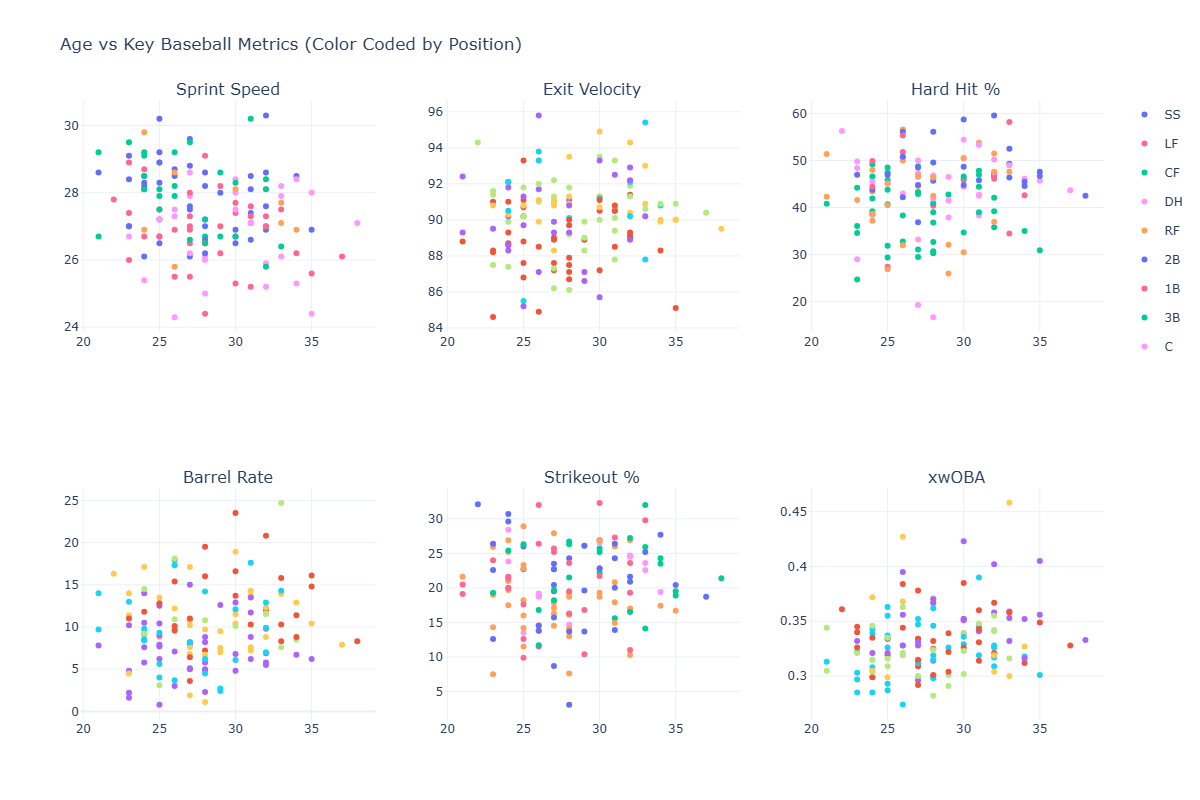

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

metrics = [
    ("sprint_speed", "Sprint Speed"),
    ("exit_velocity_avg", "Exit Velocity"),
    ("hard_hit_percent", "Hard Hit %"),
    ("barrel_batted_rate", "Barrel Rate"),
    ("k_percent", "Strikeout %"),
    ("xwoba", "xwOBA")
]

positions = df25["position"].dropna().unique()

fig = make_subplots(rows=2, cols=3, subplot_titles=[m[1] for m in metrics])

for pos in positions:
    subset = df25[df25["position"] == pos]

    for i, (col, title) in enumerate(metrics):
        fig.add_trace(
            go.Scatter(
                x=subset["player_age"],
                y=subset[col],
                mode="markers",
                name=pos,  # legend shows position
                legendgroup=pos,
                showlegend=(i == 0),  # show legend only once
                text=subset["last_name, first_name"],
                hovertemplate=
                "<b>%{text}</b><br>" +
                "Age: %{x}<br>" +
                f"{title}: %{{y}}<br>" +
                f"Position: {pos}<extra></extra>"
            ),
            row=i//3 + 1, col=i%3 + 1
        )

fig.update_layout(
    title="Age vs Key Baseball Metrics (Color Coded by Position)",
    height=800,
    template="plotly_white"
)

fig.show()

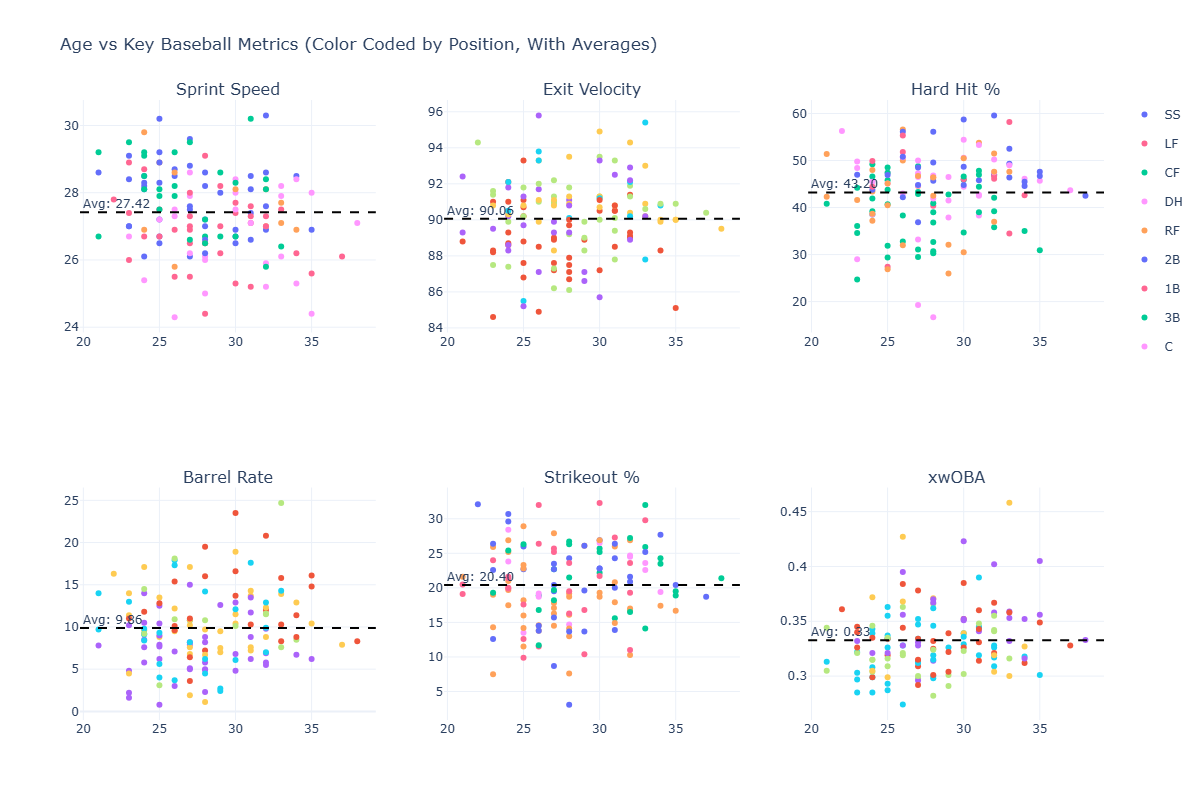

In [35]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

metrics = [
    ("sprint_speed", "Sprint Speed"),
    ("exit_velocity_avg", "Exit Velocity"),
    ("hard_hit_percent", "Hard Hit %"),
    ("barrel_batted_rate", "Barrel Rate"),
    ("k_percent", "Strikeout %"),
    ("xwoba", "xwOBA")
]

positions = df25["position"].dropna().unique()

fig = make_subplots(rows=2, cols=3, subplot_titles=[m[1] for m in metrics])

# add scatter traces by position
for pos in positions:
    subset = df25[df25["position"] == pos]

    for i, (col, title) in enumerate(metrics):
        fig.add_trace(
            go.Scatter(
                x=subset["player_age"],
                y=subset[col],
                mode="markers",
                name=pos,
                legendgroup=pos,
                showlegend=(i == 0),
                text=subset["last_name, first_name"],
                hovertemplate=
                "<b>%{text}</b><br>" +
                "Age: %{x}<br>" +
                f"{title}: %{{y}}<br>" +
                f"Position: {pos}<extra></extra>"
            ),
            row=i//3 + 1, col=i%3 + 1
        )

# add average lines
for i, (col, title) in enumerate(metrics):
    row = i // 3 + 1
    col_idx = i % 3 + 1
    avg_value = df25[col].mean()

    fig.add_hline(
        y=avg_value,
        row=row,
        col=col_idx,
        line_dash="dash",
        line_width=2,
        line_color="black",
        annotation_text=f"Avg: {avg_value:.2f}",
        annotation_position="top left"
    )

fig.update_layout(
    title="Age vs Key Baseball Metrics (Color Coded by Position, With Averages)",
    height=800,
    template="plotly_white"
)

fig.show()


### Regression ###

COEFFICIENTS: AGE, SALARY, 1B, 2B, 3B, C, DH, OF, SS
[-1.15965534e+00  9.73437206e-07  5.84004433e+00 -2.52113644e+00
 -1.47942355e+01  7.24703297e+00  8.24263085e+00  3.00327648e+00
 -7.01761265e+00]

INTERCEPT
135.1326900425642

MODEL SCORE
0.32402545995771126


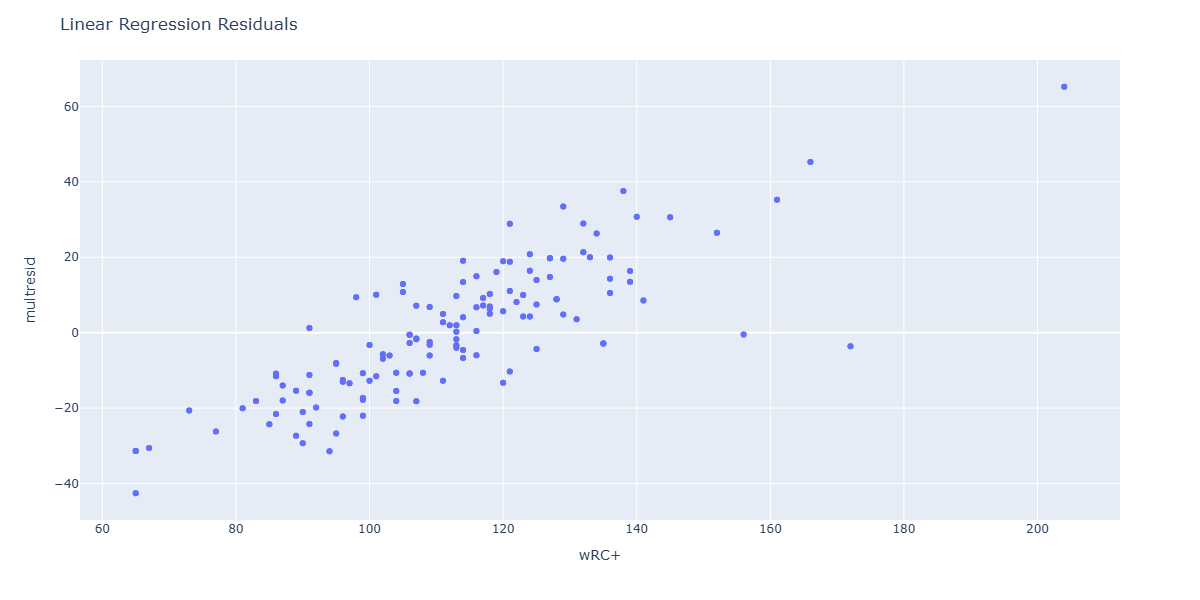

In [64]:
# Making a dataframe that has player, position,
tdf = df_combined.copy()
tdf = tdf.rename(columns = {'Player':'Name'})
df_all = pd.merge(tdf, contract_df, on = 'Name', how = 'left')

# Making a paired down dataframe with just what we need
columns = ['Pos', 'Age', 'wRC+', 'Salary']
lindf = df_all[columns]

# Cleaning dataset of NaN
lindf = lindf.dropna()

# Making dummy columns for position since it is categorical
lindum = pd.get_dummies(lindf, columns = ['Pos'])

# Defining the regression paramaters
wrcreg = LinearRegression()
x = lindum[['Age','Salary','Pos_1B','Pos_2B','Pos_3B','Pos_C','Pos_DH','Pos_OF','Pos_SS']].values.reshape(-1,9)
y = lindum['wRC+'].values

# Fitting model
wrcreg.fit(x,y)

print('COEFFICIENTS: AGE, SALARY, 1B, 2B, 3B, C, DH, OF, SS')
print(wrcreg.coef_)
print()
print('INTERCEPT')
print(wrcreg.intercept_)
print()
print('MODEL SCORE')
print(wrcreg.score(x,y))
lindum['multpredict'] = wrcreg.predict(x)
lindum['multresid'] = lindum['wRC+'] - lindum['multpredict']

fig = px.scatter(lindum,
                 x = 'wRC+',
                 y = 'multresid')

fig.update_layout(width = 800,
                  height = 600,
                  title = 'Linear Regression Residuals')

fig.show()

This tells us two main things. First, based on the residuals we can tell that linear regression is probably not the best way to go about this, as the residuals are centered around 0. Also, the model got a score of .32, which is not great either. However, if we did look at the model, it does tell us that the factor that plays the factor with the largest impact is similar between age and position, while salary actually does very little to predict something like wRC+.

# Conclusion #
what did we find made a difference, what didn't?